In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the dataset
data = pd.read_csv('crop_yield_data.csv')

Basic EDA on the dataset

In [3]:
# shpae of the dataset
print(data.shape)

(3000, 6)


In [5]:
# first few rows of the dataset
data.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [6]:
# check for missing values
data.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [10]:
# description about the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rainfall_mm,3000.0,1263.095000,432.371756,500.0,896.00,1277.0,1636.0,2000.0
soil_quality_index,3000.0,5.506667,2.855172,1.0,3.00,6.0,8.0,10.0
farm_size_hectares,3000.0,498.801000,287.122742,10.0,242.00,505.0,741.0,1000.0
sunlight_hours,3000.0,7.995333,2.621501,4.0,6.00,8.0,10.0,12.0
fertilizer_kg,3000.0,1549.450333,814.326919,100.0,869.75,1542.0,2225.0,3000.0
crop_yield,3000.0,328.099000,145.036503,46.0,199.00,332.0,455.0,628.0


In [7]:
# check for duplicate rows
data.duplicated().sum()

np.int64(0)

In [8]:
# get the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


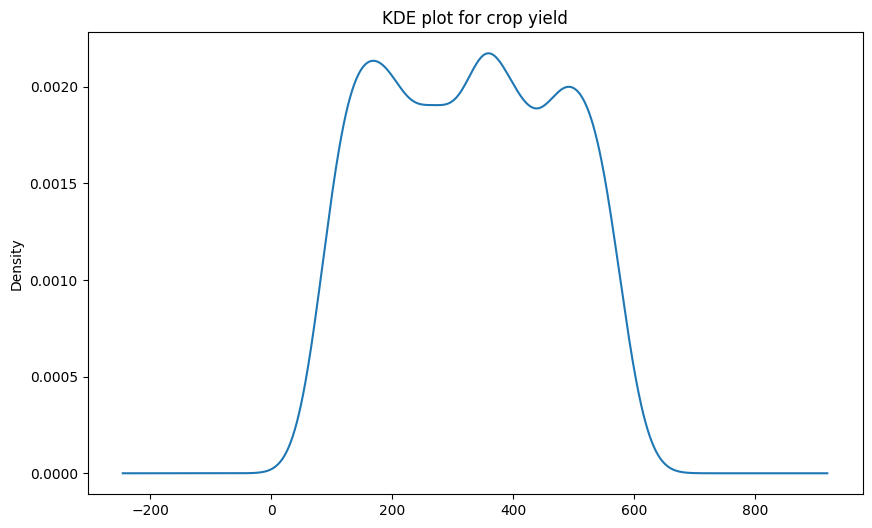

In [9]:
# plot a kde plot for the target variable
plt.figure(figsize=(10, 6))
data['crop_yield'].plot(kind='kde')
plt.title('KDE plot for crop yield')
plt.show()

Feature Engineering

In [11]:
# train test split
X = data.drop('crop_yield', axis=1)
y = data['crop_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# scale the data   
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(X_train.shape, X_test.shape)

(2400, 5) (600, 5)


In [14]:
X_train[:5]

array([[ 1.04853371e+00, -1.22217444e+00,  1.48654870e+00,
        -1.15740560e+00,  9.67355907e-01],
       [-1.45993058e-03, -5.20950760e-01,  5.67102520e-01,
         1.51941352e+00, -6.14150719e-01],
       [ 1.61516023e+00, -8.71562600e-01,  5.04174645e-01,
         1.51941352e+00, -8.68955814e-01],
       [ 1.26824604e+00, -8.71562600e-01, -9.74630436e-01,
        -3.92600138e-01,  2.36016282e-01],
       [ 1.34456716e+00, -1.70338919e-01,  1.11247744e+00,
        -3.92600138e-01, -7.02352483e-01]])

Model selection 


In [15]:
# train multiple models and get the best model
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [17]:
# Define the hyperparameters
params = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.1, 0.5, 1, 2, 5]},
    'Ridge': {'alpha': [0.1, 0.5, 1, 2, 5]},
    'KNN': {'n_neighbors': [5, 10, 15, 20], 'weights': ['uniform', 'distance']},
    'SVM': {'C': [0.1, 0.5, 1, 2, 5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    'Decision Tree': {'criterion': ['squared_error', 'absolute_error'], 'max_depth': [10, 20, 30, 40, 50]},
    'Random Forest': {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50]}
}

# Perform hyperparameter tuning
best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grid=params[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f'{name} model trained successfully')

Linear Regression model trained successfully
Lasso model trained successfully
Ridge model trained successfully
KNN model trained successfully
SVM model trained successfully
Decision Tree model trained successfully
Random Forest model trained successfully


In [18]:
# get the best model
best_models

{'Linear Regression': LinearRegression(),
 'Lasso': Lasso(alpha=0.1),
 'Ridge': Ridge(alpha=0.1),
 'KNN': KNeighborsRegressor(n_neighbors=10, weights='distance'),
 'SVM': SVR(C=5, kernel='linear'),
 'Decision Tree': DecisionTreeRegressor(max_depth=20),
 'Random Forest': RandomForestRegressor(max_depth=50, n_estimators=400)}

In [19]:
# get the best model among the trained models
best_model = None
best_score = 0
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_model = model
print(f'Best Model: {best_model}')


Best Model: Ridge(alpha=0.1)


In [20]:
# Train the best model
best_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [21]:
# Make predictions
y_pred = best_model.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.08160782606307009
R2 Score: 0.9999961891800929


In [23]:
# save the model
import joblib
joblib.dump(best_model, 'crop_yield_prediction_model.pkl')

['crop_yield_prediction_model.pkl']

In [25]:
# save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
# make a sample prediction
sample_input = X_test[0].reshape(1, -1)
sample_output = best_model.predict(sample_input)
print(f'Sample Input: {sample_input}')
print(f'Sample Output: {sample_output}')


Sample Input: [[ 1.25899499  1.58272028 -1.1459341  -0.77500287 -0.50634856]]
Sample Output: [181.10194968]
